In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2026-01-31 01:20:52--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2026-01-31 01:20:53 (170 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:

dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], drop_first=True)
train_dataset = dataset.sample(frac=0.8,random_state=42)
test_dataset = dataset.drop(train_dataset.index)
train_label = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [4]:


model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(train_dataset.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.mse, metrics=['mse','mae'])

history = model.fit(train_dataset, train_label, epochs=150, validation_split=0.2)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 233953216.0000 - mae: 10978.0342 - mse: 233953216.0000 - val_loss: 115863952.0000 - val_mae: 6715.0630 - val_mse: 115863952.0000
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 142796912.0000 - mae: 8256.3047 - mse: 142796912.0000 - val_loss: 100184080.0000 - val_mae: 8663.6006 - val_mse: 100184080.0000
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 116936896.0000 - mae: 8781.4385 - mse: 116936896.0000 - val_loss: 107215736.0000 - val_mae: 9250.0996 - val_mse: 107215736.0000
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 117825304.0000 - mae: 8770.2607 - mse: 117825304.0000 - val_loss: 76915584.0000 - val_mae: 4975.7202 - val_mse: 76915584.0000
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 93298936.0000 - mae: 6923.1104 - mse: 93298936.0000 - val_loss: 43103288.0000 - val_mae: 4293.7139 - val_mse: 43103288.0000
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 48024920.0000 - ma

9/9 - 0s - 6ms/step - loss: 27005764.0000 - mae: 3173.8064 - mse: 27005764.0000
Testing set Mean Abs Error: 3173.81 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


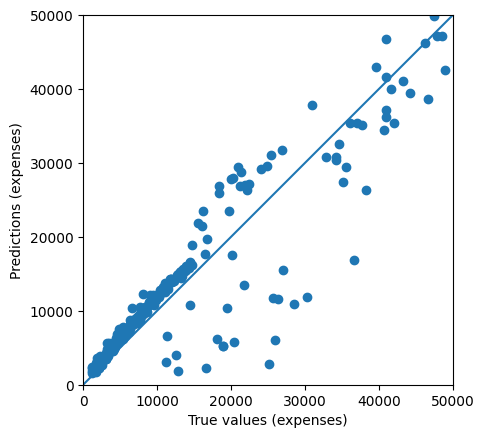

In [5]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mse, mae = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
